In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
import librosa
import librosa.display
import IPython.display as ipd

In [14]:
file_path = 'sound.wav'

data, sr = librosa.load(file_path, sr=None)

duration_sec = 5
data = data[:sr * duration_sec]

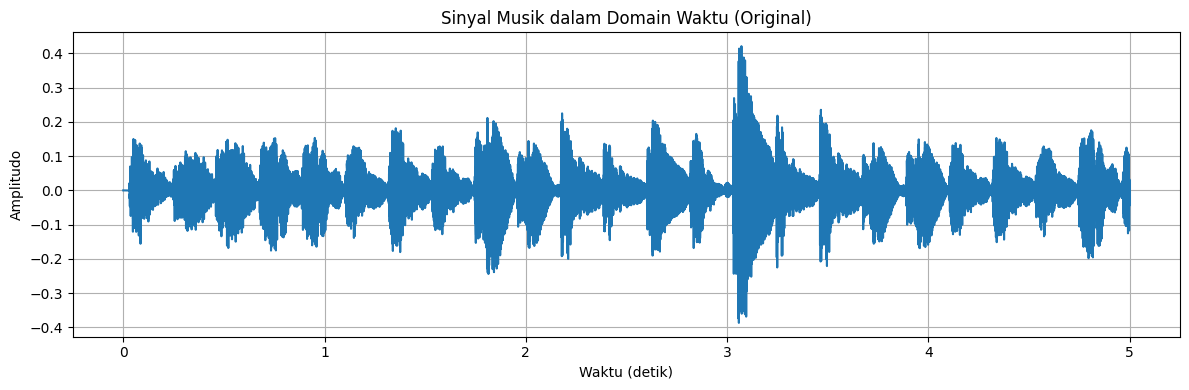

In [15]:
time = np.linspace(0, len(data)/sr, len(data))
plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.title("Sinyal Musik dalam Domain Waktu (Original)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
fft_data = fft(data)
frequencies = np.fft.fftfreq(len(data), d=1/sr)
magnitude = np.abs(fft_data)

In [17]:
positive_freqs = frequencies[:len(frequencies)//2]
positive_mag = magnitude[:len(magnitude)//2]
dominant_freq = positive_freqs[np.argmax(positive_mag)]
print(f"Frekuensi dominan: {dominant_freq:.2f} Hz")

Frekuensi dominan: 441.00 Hz


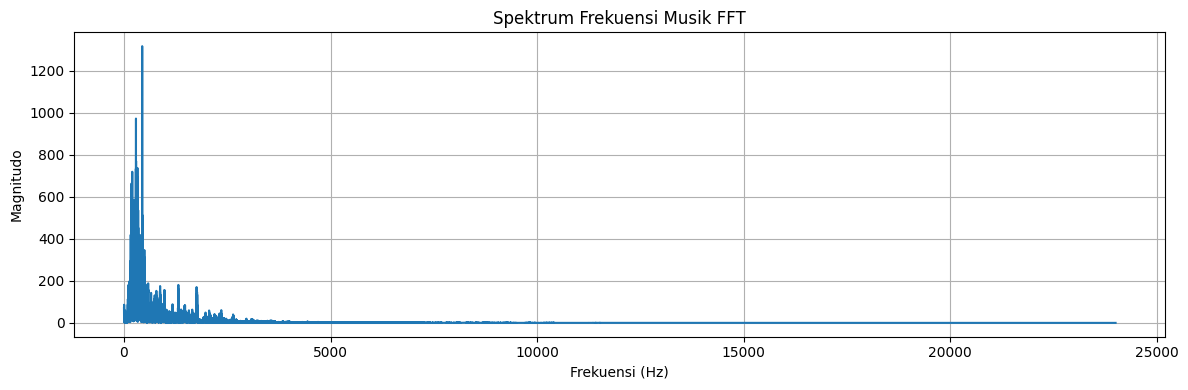

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(positive_freqs, positive_mag)
plt.title("Spektrum Frekuensi Musik FFT")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitudo")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
reconstructed = ifft(fft_data)
reconstructed = np.real(reconstructed)

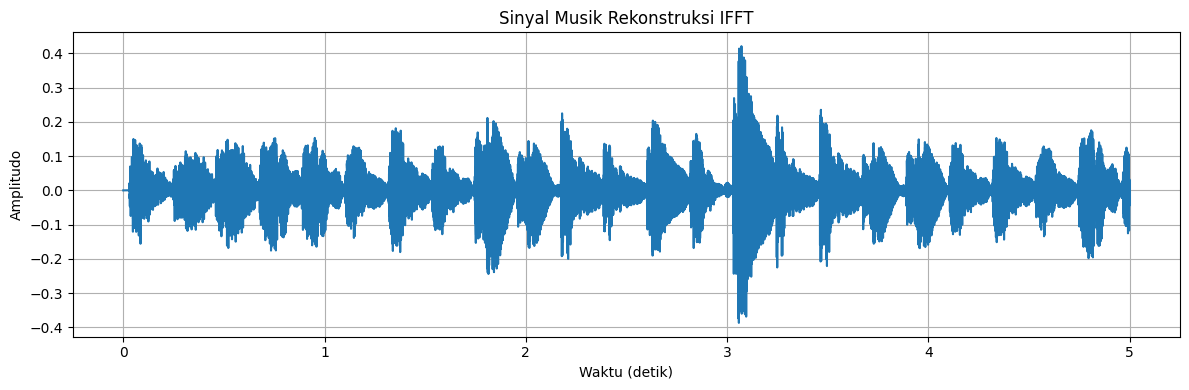

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(time, reconstructed)
plt.title("Sinyal Musik Rekonstruksi IFFT")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
print("Sinyal Original:")
ipd.display(ipd.Audio(data, rate=sr))

Sinyal Original:


In [22]:
print("Sinyal Rekonstruksi:")
ipd.display(ipd.Audio(reconstructed, rate=sr))

Sinyal Rekonstruksi:


## Penjelasan dan Refleksi

Pada Tugas ini, saya menggunakan klip pendek violin strums berdurasi 6 detik dengan format .wav, lalu kami pangkas sehingga klip suara berdurasi 5 detik saja. Sinyal audio diubah menjadi frekuensi menggunakan FFT. Setelah spektrum frekuensi dihitung, terlihat bahwa frekuensi dominan berada pada 440 Hz.

Selanjutnya kami menerapkan IFFT untuk mengembalikan sinyal dari domain frekuensi ke domain waktu. Hasilnya menunjukkan bahwa sinyal rekonstruksi sangat mirip dengan sinyal asli jika didengar ulang.